# Capstone Project - The Battle of Neighborhoods - Madrid (Spain)

### Applied Data Science Capstone by IBM/Coursera

   ## Table of Contents
    1. Introduction - Business Problem
    2. Data
    3. Methodology
    4. Results
    5. Discussion
    6. Conclusion

## 1.- Introduction - Business Problem

In this project we will try to find the best location for a Japanese restaurant in the city center of Madrid, Spain.

Madrid is not only a touristic city but also the center of many businesses with their employees having lunch every day near their offices. The 
city center is the crowdest area but also has many restaurants established there already.

The locations that we will analyze are the ones located near "Puerta del sol" which is considered the center point of the city. Those locations will have as potential customers not only the tourists, but also the people working nearby.

We will be interested in the location that doesn't have any Japanese restaurant (if any) and also those with less restaurants in general. We will also study other venues located in those areas, as it can be as well a decisive point to choose one area over another. If there are a good variety of venues, it might attract more people to the area rather than an area with a lack of them.

Taking all this information into account, advantages of each area will be explained so the stakeholders can choose the most suitable area for their restaurant.

## 2.- Data

We will use Foursquare to get the data necessary to analyze the areas. 
- Are there other Japanese restaurants in the area?
- What kind of restaurants apart from Japanese are around the area?
- Are there leisure activities to attract people in that area?

We will display the information into a map to visually understand the data. In order to do that, we will extract from Wikipedia the list of boroughs and neighborhoods of Madrid. We will also download from github the coordinates of the boundaries of the boroughs and neighborhoods in Madrid.

### Installing and importing Libraries

In [1]:
!pip install geocoder #installing geocoder

!pip install folium  #installing folium

print('All installed')

/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/secretstorage/dhcrypto.py:16: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/secretstorage/util.py:25: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
     |████████████████████████████████| 98 kB 8.9 MB/s  eta 0:00:01
/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/secretstorage/dhcrypto.py:16: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/secretstorage/util.py:25: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
     |██████████████████████████

In [2]:
import pandas as pd  # library for data analsysis
import numpy as np # library to handle data in a vectorized manner

import geocoder # import geocoder
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors
import matplotlib.pyplot as plt

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# import k-means from clustering stage
from sklearn.cluster import KMeans

import folium # map rendering library
import json

print('Libraries imported.')

Libraries imported.


### Retreiving the URL and data of boroughs and neighborhoods in Madrid

In [3]:
# Retreiving the URL of Wikipedia and creating a data frame

url = 'https://es.wikipedia.org/wiki/Anexo:Distritos_de_Madrid'
r = requests.get(url)

df_results = pd.read_html(r.text) # this parses all the tables in webpages to a list
df_all_columns = df_results[0]
df_all_columns.head()

,Número,Nombre,Superficie[n. 1]​ (Ha.),Población,Densidad(Hab./Ha.),Imagen,Barrios
0,1.0,Centro,NaN,NaN,NaN,NaN,Palacio (11)Embajadores (12)Cortes (13)Justici...
1,2.0,Arganzuela,NaN,NaN,NaN,NaN,Imperial (21)Acacias (22)Chopera (23)Legazpi (...
2,3.0,Retiro,NaN,NaN,NaN,NaN,Pacífico (31)Adelfas (32)Estrella (33)Ibiza (3...
3,4.0,Salamanca,NaN,NaN,NaN,NaN,Recoletos (41)Goya (42)Fuente del Berro (43)Gu...
4,5.0,Chamartín,NaN,NaN,NaN,NaN,El Viso (51)Prosperidad (52)Ciudad Jardín (53)...


In [4]:
# We clean the table dropping the unnecesary columns and renaming the ones we are going to use: Borough and Neighborhoods

df = df_all_columns.drop(['Número', 'Superficie[n. 1]​ (Ha.)', 'Población', 'Densidad(Hab./Ha.)','Imagen'], axis=1)
df.rename(columns={'Nombre': 'Borough', 'Barrios': 'Neighborhoods'}, inplace=True)
df

,Borough,Neighborhoods
0,Centro,Palacio (11)Embajadores (12)Cortes (13)Justici...
1,Arganzuela,Imperial (21)Acacias (22)Chopera (23)Legazpi (...
2,Retiro,Pacífico (31)Adelfas (32)Estrella (33)Ibiza (3...
3,Salamanca,Recoletos (41)Goya (42)Fuente del Berro (43)Gu...
4,Chamartín,El Viso (51)Prosperidad (52)Ciudad Jardín (53)...
5,Tetuán,Bellas Vistas (61)Cuatro Caminos (62)Castillej...
6,Chamberí,Gaztambide (71)Arapiles (72)Trafalgar (73)Alma...
7,Fuencarral-El Pardo,El Pardo (81)Fuentelarreina (82)Peñagrande (83...
8,Moncloa-Aravaca,Casa de Campo (91)Argüelles (92)Ciudad Univers...
9,Latina,Los Cármenes (101)Puerta del Ángel (102)Lucero...


Boroughs in Madrid are numerated from their distance to the "kilometer zero" in "Puerta del sol", in the city center. The borough where Puerta del sol is located is the first one called "Centro". We will study directly the neighborhoods in that borough.

In [5]:
df_center = df[0:1]
df_center

,Borough,Neighborhoods
0,Centro,Palacio (11)Embajadores (12)Cortes (13)Justici...


In [6]:
# We prepare and clean the dataframe to show the neighborhoods in different rows with the proper name

df = df_center.Neighborhoods.str.split(')').apply(pd.Series)
df.index = df_center.Borough                                   
df = df.stack().reset_index('Borough')

df.rename(columns={0: 'Neighborhoods'}, inplace=True)

df['Neighborhoods'].replace('', np.nan, inplace=True)
df.dropna(subset=['Neighborhoods'], inplace=True)
df = df.reset_index(drop=True)

df['Neighborhoods'] = df['Neighborhoods'].str.replace('\s\(..', '')
df

,Borough,Neighborhoods
0,Centro,Palacio
1,Centro,Embajadores
2,Centro,Cortes
3,Centro,Justicia
4,Centro,Universidad
5,Centro,Sol


In [7]:
df.shape

(6, 2)

### Finding the coordinates of the Neighborhoods

We find the latitute and longitude of Madrid and the neighborhoods object to study in the city center.

Use geopy library to get the latitude and longitude values of Madrid:

In [8]:
address = 'Madrid, Spain'

geolocator = Nominatim(user_agent="madrid_explorer")
location = geolocator.geocode(address)
latitude_madrid = location.latitude
longitude_madrid = location.longitude
print('The geograpical coordinate of Madrid are {}, {}.'.format(latitude_madrid, longitude_madrid))

The geograpical coordinate of Madrid are 40.4167047, -3.7035825.


Use geopy library to get the latitude and longitude values of the neighborhoods:

In [9]:
neighborhoods = df['Neighborhoods'].tolist()
borougs = df['Borough'].tolist()

column_names = ['Neighborhood', 'Latitude', 'Longitude']
df_latlon=pd.DataFrame(columns=column_names)

lat = []
lon = []
neig = []

for neighb, bor in zip(neighborhoods, borougs):
    address = str(neighb + ', ' + bor + ', Madrid, Spain')

    geolocator = Nominatim(user_agent="madrid_explorer")
    location = geolocator.geocode(address)
    latitude = location.latitude
    longitude = location.longitude
    
    lat.append(latitude)
    lon.append(longitude)
    neig.append(neighb)
    
df_latlon['Latitude'] = lat
df_latlon['Longitude'] = lon
df_latlon['Neighborhood'] = neig
df_latlon

,Neighborhood,Latitude,Longitude
0,Palacio,40.415129,-3.715618
1,Embajadores,40.409681,-3.701644
2,Cortes,40.414348,-3.698525
3,Justicia,40.423957,-3.695747
4,Universidad,40.425426,-3.706023
5,Sol,40.416947,-3.703489


In [10]:
df_latlon.shape

(6, 3)

In [11]:
# We add the Latitude and Longitude columns to the original data frame:

df[['Latitude','Longitude']] = df_latlon[['Latitude','Longitude']]
df

,Borough,Neighborhoods,Latitude,Longitude
0,Centro,Palacio,40.415129,-3.715618
1,Centro,Embajadores,40.409681,-3.701644
2,Centro,Cortes,40.414348,-3.698525
3,Centro,Justicia,40.423957,-3.695747
4,Centro,Universidad,40.425426,-3.706023
5,Centro,Sol,40.416947,-3.703489


Geographical coordinates of the borough: Centro

In [12]:
address = 'Centro, Madrid'

geolocator = Nominatim(user_agent="madrid_explorer")
location = geolocator.geocode(address)
centro_latitude = location.latitude
centro_longitude = location.longitude
print('The geograpical coordinate of Centro borough are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Centro borough are 40.4169467, -3.7034891.


### Visualization of Centro borough with the neighborhoods in it

In [13]:
# create map of the borough of Centro using latitude and longitude values

map_centro = folium.Map(location=[centro_latitude, centro_longitude], zoom_start=15)

# add markers to map
for lat, lng, label in zip(df['Latitude'], df['Longitude'], df['Neighborhoods']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=7,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_centro)  
    
map_centro

### Explore the first neighborhood in the dataframe

In [14]:
# Get the first neighborhood's latitude and longitude values

neighborhood_name = df.loc[0, 'Neighborhoods'] # neighborhood name
neighborhood_latitude = df.loc[0, 'Latitude'] # neighborhood latitude value
neighborhood_longitude = df.loc[0, 'Longitude'] # neighborhood longitude value



print('Latitude and longitude values of {} are {}, {}.'.format(neighborhood_name, 
                                                               neighborhood_latitude, 
                                                               neighborhood_longitude))

Latitude and longitude values of Palacio are 40.41512925, -3.7156179983990922.


### Define Foursquare Credentials and Version

In [15]:
# @hidden_cell

CLIENT_ID = 'YRIEOQM2XWAC25D5C5PFTQOIOXMUXNC5RL2KE42LFPJGVSDT' # your Foursquare ID
CLIENT_SECRET = 'VQTVZDL4D14SND5ZBEWPSSYSNTLPIPIKV52RR3E3XTLPE4YC' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version
LIMIT = 100 # A default Foursquare API limit value

#print('Your credentails:')
#print('CLIENT_ID: ' + CLIENT_ID)
#print('CLIENT_SECRET: ' + CLIENT_SECRET)

### Get the top 100 venues that are in Palacio, Centro within a radius of 500 meters

In [16]:
LIMIT = 100 # limit of number of venues returned by Foursquare API

radius = 500 # define radius

# create URL
url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    neighborhood_latitude, 
    neighborhood_longitude, 
    radius, 
    LIMIT)
#url # display URL

In [53]:
results = requests.get(url).json()
#results

In [18]:
# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

Clean the json and structure it into a pandas dataframe

In [19]:
venues = results['response']['groups'][0]['items']
    
nearby_venues = json_normalize(venues) # flatten JSON

# filter columns
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues =nearby_venues.loc[:, filtered_columns]

# filter the category for each row
nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1)

# clean columns
nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]

nearby_venues.head()

/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/ipykernel/__main__.py:3: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  app.launch_new_instance()


,name,categories,lat,lng
0,Santa Iglesia Catedral de Santa María la Real ...,Church,40.415767,-3.714516
1,Plaza de la Almudena,Plaza,40.416320,-3.713777
2,Taberna Rayuela,Tapas Restaurant,40.413179,-3.713496
3,Cervecería La Mayor,Beer Bar,40.415218,-3.712194
4,Palacio Real de Madrid,Palace,40.417940,-3.714259


In [20]:
# How many venues were returned by Foursquare?

print('{} venues were returned by Foursquare.'.format(nearby_venues.shape[0]))

49 venues were returned by Foursquare.


### Explore Neighborhoods in the borough: Centro

In [21]:
# Function to repeat the same process and extract the venues for all neighborhoods:
    
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [22]:
# Apply the function to our dataframe. We print the neighborhoods to check that the function worked properly.

centro_venues = getNearbyVenues(names=df['Neighborhoods'],
                                   latitudes=df['Latitude'],
                                   longitudes=df['Longitude'])

Palacio
Embajadores
Cortes
Justicia
Universidad
Sol


In [23]:
# Visualize the new data frame with all the venues and coordinates of each venue:

print(centro_venues.shape)
centro_venues.head()

(539, 7)


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Palacio,40.415129,-3.715618,Santa Iglesia Catedral de Santa María la Real ...,40.415767,-3.714516,Church
1,Palacio,40.415129,-3.715618,Plaza de la Almudena,40.416320,-3.713777,Plaza
2,Palacio,40.415129,-3.715618,Taberna Rayuela,40.413179,-3.713496,Tapas Restaurant
3,Palacio,40.415129,-3.715618,Cervecería La Mayor,40.415218,-3.712194,Beer Bar
4,Palacio,40.415129,-3.715618,Palacio Real de Madrid,40.417940,-3.714259,Palace


In [24]:
# How many venues were returned for each neighborhood:

centro_venues_count = centro_venues.groupby('Neighborhood').count()
centro_venues_count

,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighborhood,,,,,,
Cortes,100,100,100,100,100,100
Embajadores,98,98,98,98,98,98
Justicia,100,100,100,100,100,100
Palacio,49,49,49,49,49,49
Sol,92,92,92,92,92,92
Universidad,100,100,100,100,100,100


In [25]:
#How many unique categories we have from all the returned venues:

print('There are {} uniques categories.'.format(len(centro_venues['Venue Category'].unique())))

There are 140 uniques categories.


### We create now 2 dataframes: one for restaurants and the other for the rest of the venues

In [26]:
# Restaurants dataframe:

df_restaurants = centro_venues[centro_venues['Venue Category'].str.contains('Restaurant')].reset_index(drop=True)
df_restaurants

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Palacio,40.415129,-3.715618,Taberna Rayuela,40.413179,-3.713496,Tapas Restaurant
1,Palacio,40.415129,-3.715618,Charlie Champagne,40.413936,-3.712647,Restaurant
2,Palacio,40.415129,-3.715618,El Landó,40.411900,-3.715076,Spanish Restaurant
3,Palacio,40.415129,-3.715618,la gastroteca de santiago,40.416639,-3.710944,Restaurant
4,Palacio,40.415129,-3.715618,Gauranga Trascendental Food,40.412892,-3.713486,Vegetarian / Vegan Restaurant
...,...,...,...,...,...,...,...
136,Sol,40.416947,-3.703489,Ramen Kagura,40.416850,-3.708624,Ramen Restaurant
137,Sol,40.416947,-3.703489,Lamucca de Prado,40.414837,-3.698591,Restaurant
138,Sol,40.416947,-3.703489,Mercado de la Reina,40.419532,-3.698871,Tapas Restaurant
139,Sol,40.416947,-3.703489,Café Varela - Hotel Preciados,40.419821,-3.707595,Mediterranean Restaurant


In [27]:
# We count how many restaurants we have in each neighborhood:

df_restaurants_count = df_restaurants.groupby('Neighborhood').count().reset_index()
df_restaurants_count

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Cortes,30,30,30,30,30,30
1,Embajadores,21,21,21,21,21,21
2,Justicia,30,30,30,30,30,30
3,Palacio,19,19,19,19,19,19
4,Sol,17,17,17,17,17,17
5,Universidad,24,24,24,24,24,24


In [28]:
# How many unique categories we have from the restaurants retrieved:

print('There are {} uniques categories.'.format(len(df_restaurants['Venue Category'].unique())))

There are 30 uniques categories.


In [29]:
# Dataframe with the rest of the venues that are not restaurants:

df_other_venues = centro_venues[~centro_venues['Venue Category'].str.contains('Restaurant')].reset_index(drop=True)
df_other_venues

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Palacio,40.415129,-3.715618,Santa Iglesia Catedral de Santa María la Real ...,40.415767,-3.714516,Church
1,Palacio,40.415129,-3.715618,Plaza de la Almudena,40.416320,-3.713777,Plaza
2,Palacio,40.415129,-3.715618,Cervecería La Mayor,40.415218,-3.712194,Beer Bar
3,Palacio,40.415129,-3.715618,Palacio Real de Madrid,40.417940,-3.714259,Palace
4,Palacio,40.415129,-3.715618,Corral de la Morería,40.412619,-3.714249,Performing Arts Venue
...,...,...,...,...,...,...,...
393,Sol,40.416947,-3.703489,Steakburger Bar (Gran Via),40.419744,-3.699453,Steakhouse
394,Sol,40.416947,-3.703489,Casa Patas,40.412677,-3.701737,Performing Arts Venue
395,Sol,40.416947,-3.703489,Ribes & Casals,40.413574,-3.701978,Fabric Shop
396,Sol,40.416947,-3.703489,Plaza Matute,40.413695,-3.699823,Plaza


In [30]:
# We count how many venues (not restaurants) we have in each neighborhood:

df_other_venues_count = df_other_venues.groupby('Neighborhood').count().reset_index()
df_other_venues_count

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Cortes,70,70,70,70,70,70
1,Embajadores,77,77,77,77,77,77
2,Justicia,70,70,70,70,70,70
3,Palacio,30,30,30,30,30,30
4,Sol,75,75,75,75,75,75
5,Universidad,76,76,76,76,76,76


In [31]:
# How many unique categories we have from the venues retrieved:

print('There are {} uniques categories.'.format(len(df_other_venues['Venue Category'].unique())))

There are 110 uniques categories.


### Analyze the venues that are not restaurants in each neighborhood:

In [32]:
# Analyze each neighborhood showing in columns the category of the venue:

# one hot encoding
other_venues_onehot = pd.get_dummies(df_other_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
other_venues_onehot['Neighborhood'] = df_other_venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [other_venues_onehot.columns[-1]] + list(other_venues_onehot.columns[:-1])
other_venues_onehot = other_venues_onehot[fixed_columns]

other_venues_onehot.head()

,Neighborhood,Accessories Store,Adult Boutique,Art Gallery,Art Museum,Arts & Crafts Store,BBQ Joint,Bakery,Bar,Bed & Breakfast,...,Spa,Sporting Goods Shop,Steakhouse,Supermarket,Tea Room,Theater,Toy / Game Store,Wine Bar,Wine Shop,Yoga Studio
0,Palacio,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Palacio,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Palacio,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Palacio,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Palacio,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [33]:
other_venues_onehot.shape

(398, 111)

In [34]:
# We group by neighborhood calculating the mean of each category venue:

other_venues_onehot_grouped = other_venues_onehot.groupby('Neighborhood').mean().reset_index()
other_venues_onehot_grouped

,Neighborhood,Accessories Store,Adult Boutique,Art Gallery,Art Museum,Arts & Crafts Store,BBQ Joint,Bakery,Bar,Bed & Breakfast,...,Spa,Sporting Goods Shop,Steakhouse,Supermarket,Tea Room,Theater,Toy / Game Store,Wine Bar,Wine Shop,Yoga Studio
0,Cortes,0.000000,0.000000,0.000000,0.014286,0.000000,0.000000,0.014286,0.100000,0.000000,...,0.014286,0.000000,0.000000,0.000000,0.000000,0.042857,0.000000,0.000000,0.000000,0.000000
1,Embajadores,0.000000,0.000000,0.051948,0.000000,0.000000,0.000000,0.025974,0.116883,0.000000,...,0.000000,0.000000,0.000000,0.012987,0.000000,0.038961,0.000000,0.000000,0.012987,0.000000
2,Justicia,0.000000,0.014286,0.014286,0.014286,0.014286,0.014286,0.071429,0.042857,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.014286,0.014286,0.000000,0.000000,0.000000,0.014286
3,Palacio,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.100000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.033333,0.000000
4,Sol,0.013333,0.000000,0.000000,0.013333,0.000000,0.000000,0.000000,0.013333,0.000000,...,0.013333,0.013333,0.013333,0.013333,0.000000,0.026667,0.000000,0.000000,0.000000,0.000000
5,Universidad,0.000000,0.000000,0.013158,0.000000,0.000000,0.000000,0.026316,0.078947,0.013158,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.039474,0.013158,0.013158,0.000000,0.000000


In [35]:
# Print top 5 venues per neighborhood:

num_top_venues = 5

for hood in other_venues_onehot_grouped['Neighborhood']:
    print("----"+hood+"----")
    temp = other_venues_onehot_grouped[other_venues_onehot_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Cortes----
     venue  freq
0    Plaza  0.11
1      Bar  0.10
2    Hotel  0.09
3     Café  0.06
4  Theater  0.04


----Embajadores----
       venue  freq
0        Bar  0.12
1       Café  0.10
2      Plaza  0.08
3     Hostel  0.06
4  Bookstore  0.05


----Justicia----
           venue  freq
0         Bakery  0.07
1          Hotel  0.06
2  Deli / Bodega  0.06
3      Bookstore  0.06
4    Flower Shop  0.04


----Palacio----
           venue  freq
0          Plaza  0.17
1  Historic Site  0.10
2            Bar  0.10
3    Music Venue  0.07
4       Beer Bar  0.07


----Sol----
          venue  freq
0         Plaza  0.12
1         Hotel  0.12
2        Hostel  0.05
3  Gourmet Shop  0.05
4     Bookstore  0.04


----Universidad----
          venue  freq
0          Café  0.09
1           Bar  0.08
2     Bookstore  0.07
3         Plaza  0.04
4  Cocktail Bar  0.04




In [36]:
# Function to sort the venues in descending order

def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [37]:
# We prepare a dataframe that shows the top 10 most common venues for each neighborhood:

num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted_other = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted_other['Neighborhood'] = other_venues_onehot_grouped['Neighborhood']

for ind in np.arange(other_venues_onehot_grouped.shape[0]):
    neighborhoods_venues_sorted_other.iloc[ind, 1:] = return_most_common_venues(other_venues_onehot_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted_other

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Cortes,Plaza,Bar,Hotel,Café,Theater,Bookstore,Pizza Place,Deli / Bodega,Coffee Shop,Cocktail Bar
1,Embajadores,Bar,Café,Plaza,Hostel,Art Gallery,Bookstore,Coffee Shop,Pizza Place,Hotel,Theater
2,Justicia,Bakery,Bookstore,Hotel,Deli / Bodega,Flower Shop,Plaza,Bar,Bistro,Café,Lounge
3,Palacio,Plaza,Bar,Historic Site,Music Venue,Beer Bar,Church,Pizza Place,Ice Cream Shop,Performing Arts Venue,Garden
4,Sol,Plaza,Hotel,Gourmet Shop,Hostel,Bookstore,Cosmetics Shop,Coffee Shop,Cocktail Bar,Clothing Store,Pastry Shop
5,Universidad,Café,Bar,Bookstore,Coffee Shop,Plaza,Cocktail Bar,Theater,Hotel,Miscellaneous Shop,Bakery


### Find out how many Japanese restaurants are in the neighborhoods

We find how many Japanese restaurants are already located in the neighborhoods. We differenciate among 3 categories: Japanese (as general Japanese food), sushi or ramen restaurants.

In [38]:
# We create first a dataframe showing in columns all different types of restaurants:

# one hot encoding
restaurants_onehot = pd.get_dummies(df_restaurants[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
restaurants_onehot['Neighborhood'] = df_restaurants['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [restaurants_onehot.columns[-1]] + list(restaurants_onehot.columns[:-1])
restaurants_onehot = restaurants_onehot[fixed_columns]

restaurants_onehot.head()

,Neighborhood,American Restaurant,Argentinian Restaurant,Chinese Restaurant,Comfort Food Restaurant,Dumpling Restaurant,Falafel Restaurant,Greek Restaurant,Grilled Meat Restaurant,Hawaiian Restaurant,...,Seafood Restaurant,South American Restaurant,Spanish Restaurant,Sushi Restaurant,Swiss Restaurant,Tapas Restaurant,Thai Restaurant,Vegetarian / Vegan Restaurant,Venezuelan Restaurant,Vietnamese Restaurant
0,Palacio,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1,Palacio,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Palacio,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
3,Palacio,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Palacio,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [39]:
# We create a dataframe showing how many Japanese restaurants of each type we have per neighborhood:

df_total_japanese = restaurants_onehot[['Neighborhood','Japanese Restaurant', 'Sushi Restaurant', 'Ramen Restaurant']]
df_total_japanese = df_total_japanese.groupby('Neighborhood').sum()
df_total_japanese

,Japanese Restaurant,Sushi Restaurant,Ramen Restaurant
Neighborhood,,,
Cortes,0,2,0
Embajadores,0,2,0
Justicia,1,1,0
Palacio,1,0,1
Sol,0,0,1
Universidad,1,0,0


In [40]:
# We create a dataframe showing the name and coordinates of all Japanese restaurants:

df_japanese = centro_venues.loc[centro_venues['Venue Category'] == 'Japanese Restaurant'].reset_index(drop=True)
df_japanese

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Palacio,40.415129,-3.715618,Sushicome,40.411369,-3.718412,Japanese Restaurant
1,Justicia,40.423957,-3.695747,Izakaya Han,40.421819,-3.698475,Japanese Restaurant
2,Universidad,40.425426,-3.706023,Konnichiwa,40.427803,-3.701857,Japanese Restaurant


In [41]:
# We create a dataframe showing the name and coordinates of all Sushi restaurants:

df_sushi = centro_venues.loc[centro_venues['Venue Category'] == 'Sushi Restaurant'].reset_index(drop=True)
df_sushi

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Embajadores,40.409681,-3.701644,Yoka Loka,40.411615,-3.698693,Sushi Restaurant
1,Embajadores,40.409681,-3.701644,Washoku Sushi,40.407504,-3.703393,Sushi Restaurant
2,Cortes,40.414348,-3.698525,Yoka Loka,40.411615,-3.698693,Sushi Restaurant
3,Cortes,40.414348,-3.698525,Umiko,40.417594,-3.697312,Sushi Restaurant
4,Justicia,40.423957,-3.695747,Sr. Ito,40.424194,-3.697464,Sushi Restaurant


In [42]:
# We create a dataframe showing the name and coordinates of all Ramen restaurants:

df_ramen = centro_venues.loc[centro_venues['Venue Category'] == 'Ramen Restaurant'].reset_index(drop=True)
df_ramen

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Palacio,40.415129,-3.715618,Killer Sobo,40.412495,-3.712479,Ramen Restaurant
1,Sol,40.416947,-3.703489,Ramen Kagura,40.416850,-3.708624,Ramen Restaurant


## 3.- Methodology

In the first step we have collected and prepared all necessary data for our project. Type and location of restaurants and other venues in the areas of study, the borough of Centre and the neighborhoods in it. We have also identified among the restaurants the ones serving Japanese food.

The second step will be the study of the neighborhoods. We will use the K-means algorithm as it's one of the most used clustering algorithms due to its simplicity. This will help us to get an idea of the structure of the data and we'll create subgroups according to its similarity. The data analyzed will be the venues without restaurants. We will present the results of the clustering in a visual map and also we will plot different maps showing the density of restaurants and venues per neighborhood to identify the best location.

### Analysis

### K-means: Clusters

In [43]:
# set number of clusters
kclusters = 2

# Drop the Neighborhood columns as it's not needed for the clustering
other_venues_clustering = other_venues_onehot_grouped.drop('Neighborhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(other_venues_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:6] 

array([1, 1, 1, 0, 1, 1], dtype=int32)

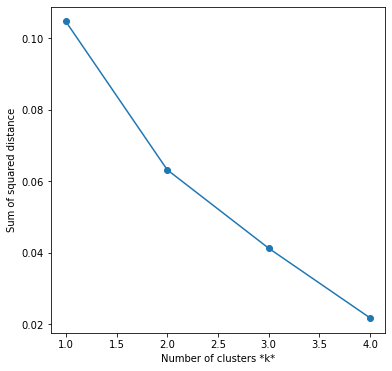

In [44]:
# Verify with the elbow method that 2 was the best number of clusters:

ssd = []
list_k = list(range(1, 5))

for k in list_k:
    km = KMeans(n_clusters=k)
    km.fit(other_venues_clustering)
    ssd.append(km.inertia_)

# Plot sse against k
plt.figure(figsize=(6, 6))
plt.plot(list_k, ssd, '-o')
plt.xlabel(r'Number of clusters *k*')
plt.ylabel('Sum of squared distance');

In [45]:
# Add 'Cluster labels' column to te dataframe with top 10 most common venues:

# unmark the line below if you run the notebook twice to drop the column first as the column will already exist:
#neighborhoods_venues_sorted.drop(['Cluster Labels'], axis=1, inplace=True)
neighborhoods_venues_sorted_other.insert(0, 'Cluster Labels', kmeans.labels_)

other_venues_merged = df

# merge neighborhoods_venues_sorted_other with df to add latitude/longitude for each neighborhood
other_venues_merged = other_venues_merged.join(neighborhoods_venues_sorted_other.set_index('Neighborhood'), on='Neighborhoods')

other_venues_merged.head() 

,Borough,Neighborhoods,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Centro,Palacio,40.415129,-3.715618,0,Plaza,Bar,Historic Site,Music Venue,Beer Bar,Church,Pizza Place,Ice Cream Shop,Performing Arts Venue,Garden
1,Centro,Embajadores,40.409681,-3.701644,1,Bar,Café,Plaza,Hostel,Art Gallery,Bookstore,Coffee Shop,Pizza Place,Hotel,Theater
2,Centro,Cortes,40.414348,-3.698525,1,Plaza,Bar,Hotel,Café,Theater,Bookstore,Pizza Place,Deli / Bodega,Coffee Shop,Cocktail Bar
3,Centro,Justicia,40.423957,-3.695747,1,Bakery,Bookstore,Hotel,Deli / Bodega,Flower Shop,Plaza,Bar,Bistro,Café,Lounge
4,Centro,Universidad,40.425426,-3.706023,1,Café,Bar,Bookstore,Coffee Shop,Plaza,Cocktail Bar,Theater,Hotel,Miscellaneous Shop,Bakery


### MAP: Clustering

We plot a map showing the neighborhoods coloured according to the results of the K-means algorithm.

In [46]:
# Create map of Centro borough: 

map_clusters_other_venues = folium.Map(location=[centro_latitude, centro_longitude], zoom_start=15)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(other_venues_merged['Latitude'], other_venues_merged['Longitude'], other_venues_merged['Neighborhoods'], other_venues_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=14,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=1).add_to(map_clusters_other_venues)
       
map_clusters_other_venues

In [47]:
other_venues_merged.loc[other_venues_merged['Cluster Labels'] == 0, other_venues_merged.columns[[1] + list(range(5, other_venues_merged.shape[1]))]]

,Neighborhoods,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Palacio,Plaza,Bar,Historic Site,Music Venue,Beer Bar,Church,Pizza Place,Ice Cream Shop,Performing Arts Venue,Garden


In [48]:
other_venues_merged.loc[other_venues_merged['Cluster Labels'] == 1, other_venues_merged.columns[[1] + list(range(5, other_venues_merged.shape[1]))]]

,Neighborhoods,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
1,Embajadores,Bar,Café,Plaza,Hostel,Art Gallery,Bookstore,Coffee Shop,Pizza Place,Hotel,Theater
2,Cortes,Plaza,Bar,Hotel,Café,Theater,Bookstore,Pizza Place,Deli / Bodega,Coffee Shop,Cocktail Bar
3,Justicia,Bakery,Bookstore,Hotel,Deli / Bodega,Flower Shop,Plaza,Bar,Bistro,Café,Lounge
4,Universidad,Café,Bar,Bookstore,Coffee Shop,Plaza,Cocktail Bar,Theater,Hotel,Miscellaneous Shop,Bakery
5,Sol,Plaza,Hotel,Gourmet Shop,Hostel,Bookstore,Cosmetics Shop,Coffee Shop,Cocktail Bar,Clothing Store,Pastry Shop


### MAP: Restaurants, other venues and Japanese restaurants

This map shows per neighborhood: all type of restaurants in blue, the other type of venues available in green, and the we differenciate the type of Japanese restaurant (Japanese: red, Sushi: white, Ramen: yellow).

In [49]:
# create map of the borough of Centro using latitude and longitude values

map_all_venues = folium.Map(location=[latitude_madrid, longitude_madrid], zoom_start=15)

# add markers to map
for lat, lng, label in zip(df_restaurants['Venue Latitude'], df_restaurants['Venue Longitude'], df_restaurants['Neighborhood']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=7,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_all_venues)  

for lat, lng, label in zip(df_other_venues['Venue Latitude'], df_other_venues['Venue Longitude'], df_other_venues['Neighborhood']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=7,
        popup=label,
        color='green',
        fill=True,
        fill_color='green',
        fill_opacity=0.7,
        parse_html=False).add_to(map_all_venues)  
    
    
for lat, lng in zip(df_japanese['Venue Latitude'], df_japanese['Venue Longitude']):
    label = folium.Popup(parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=7,
        popup=label,
        color='red',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_all_venues)  
    
for lat, lng in zip(df_sushi['Venue Latitude'], df_sushi['Venue Longitude']):
    label = folium.Popup(parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=7,
        popup=label,
        color='white',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_all_venues)  
    
for lat, lng in zip(df_ramen['Venue Latitude'], df_ramen['Venue Longitude']):
    label = folium.Popup(parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=7,
        popup=label,
        color='yellow',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_all_venues)  
    
map_all_venues

### MAP: Japanese restaurants

We can visualize only the locations of the different types of Japanese restaurants, to facilitate the analysis to make the best choice of the neighborhood (Japanese: red, Sushi: blue, Ramen: green).

In [50]:
# create map of the borough of Centro using latitude and longitude values

map_japanese = folium.Map(location=[latitude_madrid, longitude_madrid], zoom_start=15)

for lat, lng in zip(df_japanese['Venue Latitude'], df_japanese['Venue Longitude']):
    label = folium.Popup(parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=8,
        popup=label,
        color='red',
        fill=True,
        fill_color='#cc3136',
        fill_opacity=1,
        parse_html=False).add_to(map_japanese)  
    
for lat, lng in zip(df_sushi['Venue Latitude'], df_sushi['Venue Longitude']):
    label = folium.Popup(parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=8,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#1c77ff',
        fill_opacity=1,
        parse_html=False).add_to(map_japanese)  
    
for lat, lng in zip(df_ramen['Venue Latitude'], df_ramen['Venue Longitude']):
    label = folium.Popup(parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=8,
        popup=label,
        color='green',
        fill=True,
        fill_color='#16ba55',
        fill_opacity=1,
        parse_html=False).add_to(map_japanese)  
    
map_japanese

### CHOROPLET MAP: Restaurants

Using a choropleth map, we colorize the neighborhoods according to their number of restaurants. The darker is the colour, the more restaurants we find in the area.

In [51]:
# download countries geojson file
!wget --quiet https://gist.githubusercontent.com/Saigesp/8ca8ca2a4ce33e8e9efe8f5752683f88/raw/81d61ae9a410a59cb512dd7b01ba9bd5c98c8380/fixed_ESP_MAD_adm6.json


communities_geo = r'fixed_ESP_MAD_adm6.json' # geojson file

with open(communities_geo) as f:
    allFeatures = json.load(f)

# We create a dictionary to add the data of the 6 neighborhoods we need for our analysis:
firstFeatures = {}
firstFeatures['type'] = "FeatureCollection"
firstFeatures['features'] = []


for index in range(6):
    firstFeatures['features'].append(allFeatures['features'][index])


# We plot the map
restaurant_map = folium.Map(location=[latitude_madrid, longitude_madrid], zoom_start=15)

restaurant_map.choropleth(
    geo_data=firstFeatures,
    data=df_restaurants_count,
    columns=['Neighborhood', 'Venue Category'],
    key_on='feature.properties.name',
    fill_color='YlOrRd', 
    fill_opacity=0.7, 
    line_opacity=0.2,
    legend_name='Restaurants'
)

# display map
restaurant_map

/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/folium/folium.py:413: FutureWarning: The choropleth  method has been deprecated. Instead use the new Choropleth class, which has the same arguments. See the example notebook 'GeoJSON_and_choropleth' for how to do this.
  FutureWarning


### CHOROPLET MAP: Other venues

In the same way as before, we can plot a choropleth map in which we colorize the neighborhoods according to their number of venues. The darker is the colour, the more venues we find in the area.

In [52]:
other_venues_map = folium.Map(location=[latitude_madrid, longitude_madrid], zoom_start=15)

other_venues_map.choropleth(
    geo_data=firstFeatures,
    data=df_other_venues_count,
    columns=['Neighborhood', 'Venue Category'],
    key_on='feature.properties.name',
    fill_color='YlGnBu', 
    fill_opacity=0.7, 
    line_opacity=0.2,
    legend_name='Other venues'
)

# display map
other_venues_map

## 4.- Results

- From the K-means clustering we see that the neighborhood of "Palacio'' is the dissimilar one in terms of venues we can find in the area. This is also supported for both of the choropleth maps, which show that there are few restaurants and barely venues in the area compared to the other ones. Apart from this, we realise that there are already 2 restaurants located there, a Japanese restaurant and a ramen restaurant.
- "Sol" is the neighborhood with a lower amount of restaurants but it has a high amount of venues. It also has 1 Ramen restaurant in the area.
- "Embajadores" has a medium amount of restaurants and the amount of venues is high. This neighborhood has 2 sushi restaurants.
- "Universidad" has a medium amount of restaurants and the amount of venues is high. This neighborhood has 1 Japanese restaurant.
- "Justicia" has a high amount of both restaurants and venues. It also has 1 Japanese restaurant and 1 sushi restaurant.
- "Cortes" has a high amount of both restaurants and venues. It also has 2 sushi restaurants in the area.

## 5.- Discussion

Observing the results, we can confirm that "Palacio" is the less appealing area to open the new restaurant. There aren't enough venues that might attract people to the area and also already has 2 Japanese food restaurants.

The other 5 districts have a high amount of venues, so from this point of view any of them could be a good option. However, taking into account the number of restaurants in the area, "Justicia" and "Cortes" wouldn't be a good choice as the areas are already full of restaurants. On top of this, both neighborhoods have already 2 Japanese restaurants located there.

The final options are "Sol" and "Embajadores". Although it's true that "Sol" has fewer restaurants in the area, the difference is not that big to make a difference and discard "Embajadores" (17 vs 21). Regarding the Japanese restaurants located already in the area, "Embajadores" has 2 sushi restaurants, which could be enough to attract people to those restaurants instead of the new one, but a Japanese restaurant can offer a big variety of food, including sushi, so this reason could make a difference among the potential customers to be the chosen one. The neighborhood of "Sol" has only 1 ramen restaurant in the area, so a Japanese restaurant could get the potential customers as the variety will be wider than only one type of meal that it's in this case the ramen.

As a final consideration, "Sol" is the neighborhood in which "Puerta del sol" is located, and being around this area was one of the main points of this study.

## 6.- Conclusion

The purpose of this project was to identify potential neighborhoods to open a Japanese restaurant near Puerta del sol in Madrid, Spain, taking also into account other restaurants in the area, including Japanese restaurants, and other types of venues located in those areas. Using Foursquare data we could identify the amount of restaurants and other venues per neighborhood and also clustering the areas to verify the similarity between them.

Although this study has identified as potential neighborhoods "Sol" and "Embajadores", this is only a starting point for the stakeholders. They might take into account other factors and considerations which can make these options not optimal, like prices for renting the local or other social and economic factors.